# **The seventh in-class-exercise (20 points in total, 10/21/2020)**

Question description: In the last in-class-exercise (exercise-06), you collected the titles of 100 articles about data science, natural language processing, and machine learning. The 100 article titles will be used as the text corpus of this exercise. Perform the following tasks:

## (1) (8 points) Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here: 

https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [1]:
# Write your code here
import pandas as pd
import numpy as np
import spacy

In [2]:
df = pd.read_csv('/Users/yildizesener/titles.csv')

In [3]:
df

,Unnamed: 0,titles,abstracts
0,0,[PDF][PDF] Natural language processing,Description/Abstract Natural Language Processi...
1,1,Allennlp: A deep semantic natural language pro...,"This paper describes AllenNLP, a platform for ..."
2,2,Sentiment analysis: Capturing favorability usi...,This paper illustrates a sentiment analysis ap...
3,3,Natural language processing: an introduction,Objectives To provide an overview and tutorial...
4,4,Introduction to Arabic natural language proces...,This book provides system developers and resea...
...,...,...,...
95,95,Prediction and substantiation: A new approach ...,This paper describes a new approach to natural...
96,96,[BOOK][B] Lexical functions in lexicography an...,Lexical Functions in Lexicography and Natural ...
97,97,Suicide note classification using natural lang...,Suicide is the second leading cause of death a...
98,98,[HTML][HTML] A pattern dictionary for natural ...,This paper briefly surveys three of the main r...


In [4]:
# Run in python console
import nltk; nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yildizesener/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
!pip install -U gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

Requirement already up-to-date: gensim in /Users/yildizesener/anaconda3/lib/python3.7/site-packages (3.8.3)


In [6]:
print(df.titles.unique())
df.head()

['[PDF][PDF] Natural language processing'
 'Allennlp: A deep semantic natural language processing platform'
 'Sentiment analysis: Capturing favorability using natural language processing'
 'Natural language processing: an introduction'
 'Introduction to Arabic natural language processing'
 'Advances in natural language processing'
 '[PDF][PDF] Ask me anything: Dynamic memory networks for natural language processing'
 'Transformation-based error-driven learning and natural language processing: A case study in part-of-speech tagging'
 'A primer on neural network models for natural language processing'
 '[BOOK][B] Handbook of natural language processing'
 'Jumping NLP curves: A review of natural language processing research'
 'Detection of duplicate defect reports using natural language processing'
 'Sentiment analyzer: Extracting sentiments about a given topic using natural language processing techniques'
 'Neural network methods for natural language processing'
 '[BOOK][B] Natural langu

,Unnamed: 0,titles,abstracts
0,0,[PDF][PDF] Natural language processing,Description/Abstract Natural Language Processi...
1,1,Allennlp: A deep semantic natural language pro...,"This paper describes AllenNLP, a platform for ..."
2,2,Sentiment analysis: Capturing favorability usi...,This paper illustrates a sentiment analysis ap...
3,3,Natural language processing: an introduction,Objectives To provide an overview and tutorial...
4,4,Introduction to Arabic natural language proces...,This book provides system developers and resea...


In [7]:
def clean_title(s):
    discards = ['[PDF][PDF] ', '[BOOK][B] ', '[HTML][HTML] ', '[CITATION][C] ']
    for discard in discards:
        if discard in s:
            s = s.replace(discard, '')
    return s
df.titles = df.titles.apply(clean_title)

def clean_text(text):
    import re
    # removing apostrophes
    text = re.sub("'s",'',str(text))
    # removing hyphens
    text = re.sub("-",' ',str(text))
    text = re.sub("— ",'',str(text))
    # removing quotation marks
    text = re.sub('\"','',str(text))
    # removing any reference to outside text
    text = re.sub('[^\w\s]','', str(text))
    return text
    
df.titles.apply(clean_text)

0                           Natural language processing
1     Allennlp A deep semantic natural language proc...
2     Sentiment analysis Capturing favorability usin...
3           Natural language processing an introduction
4     Introduction to Arabic natural language proces...
                            ...                        
95    Prediction and substantiation A new approach t...
96    Lexical functions in lexicography and natural ...
97    Suicide note classification using natural lang...
98    A pattern dictionary for natural language proc...
99    Natural language processing method by analyzin...
Name: titles, Length: 100, dtype: object

In [8]:
# Convert to list
data = df.titles.values.tolist()

# Remove Emails
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]

pprint(data[:1])

['Natural language processing']


In [9]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:1])

[['natural', 'language', 'processing']]


In [10]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['natural', 'language', 'processing']


In [11]:
import nltk
from nltk.corpus import stopwords

In [12]:

# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stop_words(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [13]:
import nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [14]:
# Remove Stop Words
data_words_nostops = remove_stop_words(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['natural', 'language', 'processing']]


In [15]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1)]]


In [16]:
id2word[0]

'language'

In [17]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('language', 1), ('natural', 1), ('processing', 1)]]

In [18]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [19]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.130*"natural" + 0.130*"processing" + 0.130*"language" + 0.078*"learn" + '
  '0.028*"technique" + 0.028*"input" + 0.028*"textual" + 0.028*"process" + '
  '0.028*"system" + 0.028*"use"'),
 (1,
  '0.125*"natural" + 0.125*"language" + 0.125*"processing" + 0.064*"network" + '
  '0.064*"application" + 0.033*"ask" + 0.033*"memory" + 0.033*"online" + '
  '0.033*"categorization" + 0.033*"dynamic"'),
 (2,
  '0.005*"biomedical" + 0.005*"requirement" + 0.005*"interpret" + '
  '0.005*"interaction" + 0.005*"hypernymic" + 0.005*"proposition" + '
  '0.005*"overview" + 0.005*"answer" + 0.005*"query" + 0.005*"space"'),
 (3,
  '0.071*"natural" + 0.071*"language" + 0.071*"processing" + 0.036*"base" + '
  '0.036*"drive" + 0.036*"case" + 0.036*"error" + 0.036*"learn" + '
  '0.036*"transformation" + 0.036*"study"'),
 (4,
  '0.048*"use" + 0.048*"automate" + 0.048*"identification" + '
  '0.048*"postoperative" + 0.048*"record" + 0.048*"medical" + '
  '0.048*"complication" + 0.048*"electronic" + 0.048*

In [20]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -5.220307940064054

Coherence Score:  0.3780869618111361


In [21]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

/Users/yildizesener/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9     -0.159236  0.013891       1        1  19.931225
8     -0.094852 -0.114163       2        1  13.267586
18    -0.096599  0.129431       3        1  12.880899
7     -0.076640 -0.078314       4        1   8.213010
5     -0.033482  0.037030       5        1   5.595720
12    -0.038051  0.049650       6        1   4.832244
15    -0.033536 -0.050023       7        1   4.756319
17    -0.052100 -0.009584       8        1   4.380508
0     -0.062586  0.003235       9        1   3.989729
6     -0.002290 -0.009719      10        1   3.402820
1     -0.039610  0.024542      11        1   3.249139
3      0.042448  0.026280      12        1   2.950974
10     0.072763 -0.031294      13        1   2.328351
11    -0.012248 -0.004943      14        1   2.229127
4      0.073043  0.042660      15        1   1.974736
13     0.074802  0.042757      16        1   1.690706
14     0.092356 -0.067652      17        1   1.547058
19     0.096871 -0.016412      18        1   1.259545
16     0.055821 -0.001272      19        1   1.122680
2      0.193125  0.013900      20        1   0.397630, topic_info=   Category       Freq        Term      Total  loglift  logprob
16  Default  10.000000        base  10.000000  30.0000  30.0000
2   Default  79.000000  processing  79.000000  29.0000  29.0000
0   Default  81.000000    language  81.000000  28.0000  28.0000
1   Default  81.000000     natural  81.000000  27.0000  27.0000
50  Default  14.000000      system  14.000000  26.0000  26.0000
..      ...        ...         ...        ...      ...      ...
57  Topic20   0.011983    document   1.366916   0.7906  -5.3891
56  Topic20   0.011983    clinical   4.922172  -0.4906  -5.3891
81  Topic20   0.011983     article   1.377545   0.7829  -5.3891
82  Topic20   0.011983  extraction   1.377545   0.7829  -5.3891
83  Topic20   0.011983       genie   1.377545   0.7829  -5.3891

[957 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
157       6  0.717439       abstract
106       2  0.661520        account
11        1  0.634404        advance
183       2  0.661520        adverse
165       2  0.843161  advertisement
...     ...       ...            ...
218       3  0.664123         verbal
168       2  0.843161          voice
70        1  0.634403        weather
139       4  0.683956        whisper
196       3  0.664124           word

[339 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 9, 19, 8, 6, 13, 16, 18, 1, 7, 2, 4, 11, 12, 5, 14, 15, 20, 17, 3])

## (2) (8 points) Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_colwidth", 200)

In [23]:
news_df = pd.read_csv('/Users/yildizesener/titles.csv')
documents =news_df.titles

In [24]:
news_df = pd.DataFrame({'document':documents})

# removing everything except alphabets`
news_df['clean_doc'] = news_df['document'].str.replace("[^a-zA-Z#]", " ")

# removing short words
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

# make all text lowercase
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: x.lower())

In [25]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

# tokenization
tokenized_doc = news_df['clean_doc'].apply(lambda x: x.split())

# remove stop-words
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])

# de-tokenization
detokenized_doc = []
for i in range(len(news_df)):
    t = ' '.join(tokenized_doc[i])
    detokenized_doc.append(t)

news_df['clean_doc'] = detokenized_doc

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', 
max_features= 1000, # keep top 1000 terms 
max_df = 0.5, 
smooth_idf=True)

X = vectorizer.fit_transform(news_df['clean_doc'])

X.shape # check shape of the document-term matrix

(100, 258)

In [27]:
from sklearn.decomposition import TruncatedSVD

# SVD represent documents and terms in vectors 
svd_model = TruncatedSVD(n_components=20, algorithm='randomized', n_iter=100, random_state=122)

svd_model.fit(X)

len(svd_model.components_)

20

In [28]:
terms = vectorizer.get_feature_names()

for i, comp in enumerate(svd_model.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:7]
    print("Topic "+str(i)+": ")
    for t in sorted_terms:
        print(t[0])
        print(" ")

Topic 0: 
information
 
retrieval
 
based
 
book
 
method
 
learning
 
html
 
Topic 1: 
interface
 
using
 
speech
 
interactive
 
recognition
 
user
 
network
 
Topic 2: 
based
 
method
 
queries
 
sentence
 
input
 
advertisements
 
presenting
 
Topic 3: 
html
 
clinical
 
linguistic
 
biomedical
 
dictionary
 
pattern
 
decision
 
Topic 4: 
information
 
retrieval
 
rank
 
methods
 
apparatus
 
employs
 
improve
 
Topic 5: 
representation
 
lexical
 
semantic
 
data
 
clinical
 
knowledge
 
ambiguity
 
Topic 6: 
introduction
 
models
 
neural
 
arabic
 
network
 
learning
 
primer
 
Topic 7: 
introduction
 
review
 
using
 
systems
 
arabic
 
analysis
 
techniques
 
Topic 8: 
neural
 
learning
 
network
 
deep
 
review
 
transfer
 
systems
 
Topic 9: 
review
 
systems
 
interface
 
lexical
 
systematic
 
network
 
mining
 
Topic 10: 
deep
 
networks
 
semantic
 
convolutional
 
memory
 
review
 
introduction
 
Topic 11: 
medicine
 
overview
 
empirical
 
future
 
lexical
 
using
 
s

In [29]:
import umap.umap_ as umap

/Users/yildizesener/anaconda3/lib/python3.7/site-packages/umap/umap_.py:1679: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


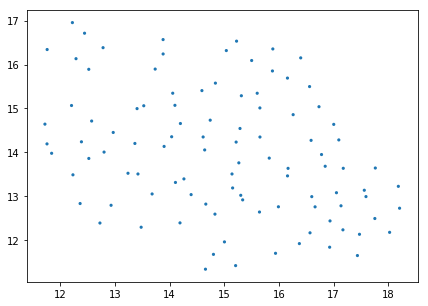

In [31]:
X_topics = svd_model.fit_transform(X)
embedding = umap.UMAP(n_neighbors=150, min_dist=0.5, random_state=12).fit_transform(X_topics)

plt.figure(figsize=(7,5))
plt.scatter(embedding[:, 0], embedding[:, 1], 
s = 10, # size
edgecolor='none'
)
plt.show()

## (3) (4 points) Compare the results generated by the two topic modeling algorithms, which one is better? You should explain the reasons in details.

In [ ]:
# Write your answer here (no code needed for this question)

# As seen in the results, both of the topic modeling techniques works better and the results provide us 
# a deep understanding in assesing of text data. On the other hand, I prefer to use LDA as the results can be interpreted better. 
# Certainly, LSA is easier and faster than LDA compared to the process of them, but still LDA presented results 
# which can be make more sense in terms of solving the topic modeling problem. LSA is only focusing on reducing dimension while building 
#the the model which is, I think, also one of reason to prefer the LDA. 